# import library

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from textblob import TextBlob
import spacy
from spacy.lang.en import English
from pathlib import Path
nlp = spacy.load("en_core_web_sm")
import en_core_web_sm
nlp = en_core_web_sm.load()
nlp = spacy.load('en_core_web_sm')
import spacy
from spacy import displacy
import spacy
nlp = spacy.load("en_core_web_sm")  
from transformers import Pipeline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [146]:
import nltk 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import brown
from nltk import FreqDist
from nltk.corpus import stopwords

In [147]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Dataset view

In [148]:
df = pd.read_csv('all_kindle_review .csv')

In [149]:
df

Unnamed: 0.1  Unnamed: 0        asin  helpful  rating  \
0                 0       11539  B0033UV8HI  [8, 10]       3   
1                 1        5957  B002HJV4DE   [1, 1]       5   
2                 2        9146  B002ZG96I4   [0, 0]       3   
3                 3        7038  B002QHWOEU   [1, 3]       3   
4                 4        1776  B001A06VJ8   [0, 1]       4   
...             ...         ...         ...      ...     ...   
11995         11995        2183  B001DUGORO   [0, 0]       4   
11996         11996        6272  B002JCSFSQ   [2, 2]       5   
11997         11997       12483  B0035N1V7K   [0, 1]       5   
11998         11998        3640  B001W1XT40   [1, 2]       1   
11999         11999       11398  B003370JUS   [5, 6]       3   

                                              reviewText   reviewTime  \
0      Jace Rankin may be short, but he's nothing to ...   09 2, 2010   
1      Great short read.  I didn't want to put it dow...   10 8, 2013   
2      I'll start by saying this is the first of four...  04 11, 2014   
3      Aggie is Angela Lansbury who carries pocketboo...   07 5, 2014   
4      I did not expect this type of book to be in li...  12 31, 2012   
...                                                  ...          ...   
11995  Valentine cupid is a vampire- Jena and Ian ano...  02 28, 2014   
11996  I have read all seven books in this series. Ap...  05 16, 2011   
11997  This book really just wasn't my cuppa.  The si...  07 26, 2013   
11998  tried to use it to charge my kindle, it didn't...  09 17, 2013   
11999  Taking Instruction is a look into the often hi...   07 5, 2012   

           reviewerID                   reviewerName  \
0      A3HHXRELK8BHQG                         Ridley   
1      A2RGNZ0TRF578I                   Holly Butler   
2      A3S0H2HV6U1I7F                        Merissa   
3       AC4OQW3GZ919J                     Cleargrace   
4      A3C9V987IQHOQD                       Rjostler   
...               ...                            ...   
11995  A1OKS5Q1HD8WQC                  lisa jon jung   
11996   AQRSPXLNEQAMA                        TerryLP   
11997  A2T5QLT5VXOJAK                        hwilson   
11998  A28MHD2DDY6DXB  Allison A. Slater "Gryphon50"   
11999  A3JUXLB4K9ZXCC                      Dafna Yee   

                                                 summary  unixReviewTime  
0                               Entertaining But Average      1283385600  
1                                Terrific menage scenes!      1381190400  
2                                       Snapdragon Alley      1397174400  
3                                 very light murder cozy      1404518400  
4                                                   Book      1356912000  
...                                                  ...             ...  
11995                                               jena      1393545600  
11996                                Peacekeepers Series      1305504000  
11997                                    a little creepy      1374796800  
11998                                        didn't work      1379376000  
11999  If you like BDSM with a touch of romance, this...      1341446400  

[12000 rows x 11 columns]

# Dataset Preprocessing

In [150]:
kd=df['rating'].count()
kd

12000

In [151]:
df.head()

Unnamed: 0.1  Unnamed: 0        asin  helpful  rating  \
0             0       11539  B0033UV8HI  [8, 10]       3   
1             1        5957  B002HJV4DE   [1, 1]       5   
2             2        9146  B002ZG96I4   [0, 0]       3   
3             3        7038  B002QHWOEU   [1, 3]       3   
4             4        1776  B001A06VJ8   [0, 1]       4   

                                          reviewText   reviewTime  \
0  Jace Rankin may be short, but he's nothing to ...   09 2, 2010   
1  Great short read.  I didn't want to put it dow...   10 8, 2013   
2  I'll start by saying this is the first of four...  04 11, 2014   
3  Aggie is Angela Lansbury who carries pocketboo...   07 5, 2014   
4  I did not expect this type of book to be in li...  12 31, 2012   

       reviewerID  reviewerName                   summary  unixReviewTime  
0  A3HHXRELK8BHQG        Ridley  Entertaining But Average      1283385600  
1  A2RGNZ0TRF578I  Holly Butler   Terrific menage scenes!      1381190400  
2  A3S0H2HV6U1I7F       Merissa          Snapdragon Alley      1397174400  
3   AC4OQW3GZ919J    Cleargrace    very light murder cozy      1404518400  
4  A3C9V987IQHOQD      Rjostler                      Book      1356912000

In [152]:
df.shape

(12000, 11)

In [153]:
df.isnull().sum()

Unnamed: 0.1       0
Unnamed: 0         0
asin               0
helpful            0
rating             0
reviewText         0
reviewTime         0
reviewerID         0
reviewerName      38
summary            0
unixReviewTime     0
dtype: int64

In [154]:
df= df.dropna()
df= df.reset_index(drop=True)
df.isnull().sum()

Unnamed: 0.1      0
Unnamed: 0        0
asin              0
helpful           0
rating            0
reviewText        0
reviewTime        0
reviewerID        0
reviewerName      0
summary           0
unixReviewTime    0
dtype: int64

# Remove Pun,full stop And clean review text

In [155]:
def cleanText(input_string):
 modified_string = re.sub('[^A-Za-z0–9]+', ' ', input_string)
 return (modified_string)
df['reviewText'] = df.reviewText.apply(cleanText)
df['reviewText'][1260]
df['reviewText']

0        Jace Rankin may be short but he s nothing to m...
1        Great short read I didn t want to put it down ...
2        I ll start by saying this is the first of four...
3        Aggie is Angela Lansbury who carries pocketboo...
4        I did not expect this type of book to be in li...
                               ...                        
11957    Valentine cupid is a vampire Jena and Ian anot...
11958    I have read all seven books in this series Apo...
11959    This book really just wasn t my cuppa The situ...
11960    tried to use it to charge my kindle it didn t ...
11961    Taking Instruction is a look into the often hi...
Name: reviewText, Length: 11962, dtype: object

In [156]:
df.describe()

Unnamed: 0.1   Unnamed: 0        rating  unixReviewTime
count  11962.000000  11962.00000  11962.000000    1.196200e+04
mean    6000.011871  10018.83573      3.250878    1.344448e+09
std     3464.561830  10489.74581      1.421646    4.365761e+07
min        0.000000      0.00000      1.000000    9.602496e+08
25%     2999.250000   3007.25000      2.000000    1.316045e+09
50%     5998.500000   6001.50000      4.000000    1.356826e+09
75%     8999.750000  12474.75000      5.000000    1.376784e+09
max    11999.000000  47770.00000      5.000000    1.405123e+09

# Single Review clean 

In [157]:
def cleanText(input_string):
    modified_string = re.sub('[^A-Za-z0–9]+',' ', input_string)
    return(modified_string)
df['reviewText'] = df.reviewText.apply(cleanText)
df['reviewText'][550]

'Very short crazy hot I like threesomes where all three interact and here indeed there was interaction aplenty Cassie grew up with Kyle and Alan and in her teenage heart had angst not knowing which one to chose not understanding why she couldn t choose But then one night she sees the two of them together and thinks that she now understands it all they weren t choosing her they had each other But now it s a few years later and she s coming home one last time before marrying someone else And very quickly issues are resolved and they form into a coherent threesome I liked it because they knew each other they had history and love so I could accept the anguished sex I liked the relationship between the men as well and there was m m m f and m f m sex The end was a little twee but it s hot hot hot and a keeper for me '

In [158]:
df['clean_Review_text']=df['reviewText'].str.lower()
df['clean_Review_text']=df['clean_Review_text'].str.translate(str.maketrans('','',string.punctuation))

# stop words remove and save new column in dataset

In [159]:
stopWords=stopwords.words('english')+['the', 'a', 'an', 'i', 'he', 'she', 'they', 'to', 'of', 'it', 'from']
def removeStopWords(stopWords, rvw_txt):
    newtxt = ' '.join([word for word in rvw_txt.split() if word not in stopWords])
    return newtxt
df['clean_Review_text'] = [removeStopWords(stopWords,x) for x in df['clean_Review_text']]
df['clean_Review_text']

0        jace rankin may short nothing mess man hauled ...
1        great short read want put read one sitting sex...
2        start saying first four books expecting conclu...
3        aggie angela lansbury carries pocketbooks inst...
4        expect type book library pleased find price right
                               ...                        
11957    valentine cupid vampire jena ian another vampi...
11958    read seven books series apocalyptic adventure ...
11959    book really cuppa situation man capturing woma...
11960    tried use charge kindle even register charging...
11961    taking instruction look often hidden world sex...
Name: clean_Review_text, Length: 11962, dtype: object

In [160]:
df

Unnamed: 0.1  Unnamed: 0        asin  helpful  rating  \
0                 0       11539  B0033UV8HI  [8, 10]       3   
1                 1        5957  B002HJV4DE   [1, 1]       5   
2                 2        9146  B002ZG96I4   [0, 0]       3   
3                 3        7038  B002QHWOEU   [1, 3]       3   
4                 4        1776  B001A06VJ8   [0, 1]       4   
...             ...         ...         ...      ...     ...   
11957         11995        2183  B001DUGORO   [0, 0]       4   
11958         11996        6272  B002JCSFSQ   [2, 2]       5   
11959         11997       12483  B0035N1V7K   [0, 1]       5   
11960         11998        3640  B001W1XT40   [1, 2]       1   
11961         11999       11398  B003370JUS   [5, 6]       3   

                                              reviewText   reviewTime  \
0      Jace Rankin may be short but he s nothing to m...   09 2, 2010   
1      Great short read I didn t want to put it down ...   10 8, 2013   
2      I ll start by saying this is the first of four...  04 11, 2014   
3      Aggie is Angela Lansbury who carries pocketboo...   07 5, 2014   
4      I did not expect this type of book to be in li...  12 31, 2012   
...                                                  ...          ...   
11957  Valentine cupid is a vampire Jena and Ian anot...  02 28, 2014   
11958  I have read all seven books in this series Apo...  05 16, 2011   
11959  This book really just wasn t my cuppa The situ...  07 26, 2013   
11960  tried to use it to charge my kindle it didn t ...  09 17, 2013   
11961  Taking Instruction is a look into the often hi...   07 5, 2012   

           reviewerID                   reviewerName  \
0      A3HHXRELK8BHQG                         Ridley   
1      A2RGNZ0TRF578I                   Holly Butler   
2      A3S0H2HV6U1I7F                        Merissa   
3       AC4OQW3GZ919J                     Cleargrace   
4      A3C9V987IQHOQD                       Rjostler   
...               ...                            ...   
11957  A1OKS5Q1HD8WQC                  lisa jon jung   
11958   AQRSPXLNEQAMA                        TerryLP   
11959  A2T5QLT5VXOJAK                        hwilson   
11960  A28MHD2DDY6DXB  Allison A. Slater "Gryphon50"   
11961  A3JUXLB4K9ZXCC                      Dafna Yee   

                                                 summary  unixReviewTime  \
0                               Entertaining But Average      1283385600   
1                                Terrific menage scenes!      1381190400   
2                                       Snapdragon Alley      1397174400   
3                                 very light murder cozy      1404518400   
4                                                   Book      1356912000   
...                                                  ...             ...   
11957                                               jena      1393545600   
11958                                Peacekeepers Series      1305504000   
11959                                    a little creepy      1374796800   
11960                                        didn't work      1379376000   
11961  If you like BDSM with a touch of romance, this...      1341446400   

                                       clean_Review_text  
0      jace rankin may short nothing mess man hauled ...  
1      great short read want put read one sitting sex...  
2      start saying first four books expecting conclu...  
3      aggie angela lansbury carries pocketbooks inst...  
4      expect type book library pleased find price right  
...                                                  ...  
11957  valentine cupid vampire jena ian another vampi...  
11958  read seven books series apocalyptic adventure ...  
11959  book really cuppa situation man capturing woma...  
11960  tried use charge kindle even register charging...  
11961  taking instruction look often hidden world sex...  

[11962 rows x 12 columns]

In [161]:
df['reviewText']

0        Jace Rankin may be short but he s nothing to m...
1        Great short read I didn t want to put it down ...
2        I ll start by saying this is the first of four...
3        Aggie is Angela Lansbury who carries pocketboo...
4        I did not expect this type of book to be in li...
                               ...                        
11957    Valentine cupid is a vampire Jena and Ian anot...
11958    I have read all seven books in this series Apo...
11959    This book really just wasn t my cuppa The situ...
11960    tried to use it to charge my kindle it didn t ...
11961    Taking Instruction is a look into the often hi...
Name: reviewText, Length: 11962, dtype: object

In [162]:
df['clean_Review_text']

0        jace rankin may short nothing mess man hauled ...
1        great short read want put read one sitting sex...
2        start saying first four books expecting conclu...
3        aggie angela lansbury carries pocketbooks inst...
4        expect type book library pleased find price right
                               ...                        
11957    valentine cupid vampire jena ian another vampi...
11958    read seven books series apocalyptic adventure ...
11959    book really cuppa situation man capturing woma...
11960    tried use charge kindle even register charging...
11961    taking instruction look often hidden world sex...
Name: clean_Review_text, Length: 11962, dtype: object

# Sentiment Analysis (find a polarity score compound and find the positive or negative)

In [163]:
sids = SentimentIntensityAnalyzer()
sids.polarity_scores(df.loc[0]['clean_Review_text'])

{'neg': 0.175, 'neu': 0.598, 'pos': 0.227, 'compound': 0.936}

In [164]:
df['scores'] =df['clean_Review_text'].apply(lambda reviews: sids.polarity_scores(reviews))

In [165]:
df

Unnamed: 0.1  Unnamed: 0        asin  helpful  rating  \
0                 0       11539  B0033UV8HI  [8, 10]       3   
1                 1        5957  B002HJV4DE   [1, 1]       5   
2                 2        9146  B002ZG96I4   [0, 0]       3   
3                 3        7038  B002QHWOEU   [1, 3]       3   
4                 4        1776  B001A06VJ8   [0, 1]       4   
...             ...         ...         ...      ...     ...   
11957         11995        2183  B001DUGORO   [0, 0]       4   
11958         11996        6272  B002JCSFSQ   [2, 2]       5   
11959         11997       12483  B0035N1V7K   [0, 1]       5   
11960         11998        3640  B001W1XT40   [1, 2]       1   
11961         11999       11398  B003370JUS   [5, 6]       3   

                                              reviewText   reviewTime  \
0      Jace Rankin may be short but he s nothing to m...   09 2, 2010   
1      Great short read I didn t want to put it down ...   10 8, 2013   
2      I ll start by saying this is the first of four...  04 11, 2014   
3      Aggie is Angela Lansbury who carries pocketboo...   07 5, 2014   
4      I did not expect this type of book to be in li...  12 31, 2012   
...                                                  ...          ...   
11957  Valentine cupid is a vampire Jena and Ian anot...  02 28, 2014   
11958  I have read all seven books in this series Apo...  05 16, 2011   
11959  This book really just wasn t my cuppa The situ...  07 26, 2013   
11960  tried to use it to charge my kindle it didn t ...  09 17, 2013   
11961  Taking Instruction is a look into the often hi...   07 5, 2012   

           reviewerID                   reviewerName  \
0      A3HHXRELK8BHQG                         Ridley   
1      A2RGNZ0TRF578I                   Holly Butler   
2      A3S0H2HV6U1I7F                        Merissa   
3       AC4OQW3GZ919J                     Cleargrace   
4      A3C9V987IQHOQD                       Rjostler   
...               ...                            ...   
11957  A1OKS5Q1HD8WQC                  lisa jon jung   
11958   AQRSPXLNEQAMA                        TerryLP   
11959  A2T5QLT5VXOJAK                        hwilson   
11960  A28MHD2DDY6DXB  Allison A. Slater "Gryphon50"   
11961  A3JUXLB4K9ZXCC                      Dafna Yee   

                                                 summary  unixReviewTime  \
0                               Entertaining But Average      1283385600   
1                                Terrific menage scenes!      1381190400   
2                                       Snapdragon Alley      1397174400   
3                                 very light murder cozy      1404518400   
4                                                   Book      1356912000   
...                                                  ...             ...   
11957                                               jena      1393545600   
11958                                Peacekeepers Series      1305504000   
11959                                    a little creepy      1374796800   
11960                                        didn't work      1379376000   
11961  If you like BDSM with a touch of romance, this...      1341446400   

                                       clean_Review_text  \
0      jace rankin may short nothing mess man hauled ...   
1      great short read want put read one sitting sex...   
2      start saying first four books expecting conclu...   
3      aggie angela lansbury carries pocketbooks inst...   
4      expect type book library pleased find price right   
...                                                  ...   
11957  valentine cupid vampire jena ian another vampi...   
11958  read seven books series apocalyptic adventure ...   
11959  book really cuppa situation man capturing woma...   
11960  tried use charge kindle even register charging...   
11961  taking instruction look often hidden world sex...   

                                                  scor

In [166]:
df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])

In [167]:
df.head()

Unnamed: 0.1  Unnamed: 0        asin  helpful  rating  \
0             0       11539  B0033UV8HI  [8, 10]       3   
1             1        5957  B002HJV4DE   [1, 1]       5   
2             2        9146  B002ZG96I4   [0, 0]       3   
3             3        7038  B002QHWOEU   [1, 3]       3   
4             4        1776  B001A06VJ8   [0, 1]       4   

                                          reviewText   reviewTime  \
0  Jace Rankin may be short but he s nothing to m...   09 2, 2010   
1  Great short read I didn t want to put it down ...   10 8, 2013   
2  I ll start by saying this is the first of four...  04 11, 2014   
3  Aggie is Angela Lansbury who carries pocketboo...   07 5, 2014   
4  I did not expect this type of book to be in li...  12 31, 2012   

       reviewerID  reviewerName                   summary  unixReviewTime  \
0  A3HHXRELK8BHQG        Ridley  Entertaining But Average      1283385600   
1  A2RGNZ0TRF578I  Holly Butler   Terrific menage scenes!      1381190400   
2  A3S0H2HV6U1I7F       Merissa          Snapdragon Alley      1397174400   
3   AC4OQW3GZ919J    Cleargrace    very light murder cozy      1404518400   
4  A3C9V987IQHOQD      Rjostler                      Book      1356912000   

                                   clean_Review_text  \
0  jace rankin may short nothing mess man hauled ...   
1  great short read want put read one sitting sex...   
2  start saying first four books expecting conclu...   
3  aggie angela lansbury carries pocketbooks inst...   
4  expect type book library pleased find price right   

                                              scores  compound  
0  {'neg': 0.175, 'neu': 0.598, 'pos': 0.227, 'co...    0.9360  
1  {'neg': 0.044, 'neu': 0.515, 'pos': 0.441, 'co...    0.9628  
2  {'neg': 0.0, 'neu': 0.771, 'pos': 0.229, 'comp...    0.8555  
3  {'neg': 0.121, 'neu': 0.718, 'pos': 0.162, 'co...    0.1531  
4  {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'comp...    0.4404

In [168]:
df['scoreStatus'] = df['compound'].apply(lambda c: 'Positive' if c >= 0 else 'Negative')
df.head()

Unnamed: 0.1  Unnamed: 0        asin  helpful  rating  \
0             0       11539  B0033UV8HI  [8, 10]       3   
1             1        5957  B002HJV4DE   [1, 1]       5   
2             2        9146  B002ZG96I4   [0, 0]       3   
3             3        7038  B002QHWOEU   [1, 3]       3   
4             4        1776  B001A06VJ8   [0, 1]       4   

                                          reviewText   reviewTime  \
0  Jace Rankin may be short but he s nothing to m...   09 2, 2010   
1  Great short read I didn t want to put it down ...   10 8, 2013   
2  I ll start by saying this is the first of four...  04 11, 2014   
3  Aggie is Angela Lansbury who carries pocketboo...   07 5, 2014   
4  I did not expect this type of book to be in li...  12 31, 2012   

       reviewerID  reviewerName                   summary  unixReviewTime  \
0  A3HHXRELK8BHQG        Ridley  Entertaining But Average      1283385600   
1  A2RGNZ0TRF578I  Holly Butler   Terrific menage scenes!      1381190400   
2  A3S0H2HV6U1I7F       Merissa          Snapdragon Alley      1397174400   
3   AC4OQW3GZ919J    Cleargrace    very light murder cozy      1404518400   
4  A3C9V987IQHOQD      Rjostler                      Book      1356912000   

                                   clean_Review_text  \
0  jace rankin may short nothing mess man hauled ...   
1  great short read want put read one sitting sex...   
2  start saying first four books expecting conclu...   
3  aggie angela lansbury carries pocketbooks inst...   
4  expect type book library pleased find price right   

                                              scores  compound scoreStatus  
0  {'neg': 0.175, 'neu': 0.598, 'pos': 0.227, 'co...    0.9360    Positive  
1  {'neg': 0.044, 'neu': 0.515, 'pos': 0.441, 'co...    0.9628    Positive  
2  {'neg': 0.0, 'neu': 0.771, 'pos': 0.229, 'comp...    0.8555    Positive  
3  {'neg': 0.121, 'neu': 0.718, 'pos': 0.162, 'co...    0.1531    Positive  
4  {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'comp...    0.4404    Positive

In [169]:
df['scoreStatus']

0        Positive
1        Positive
2        Positive
3        Positive
4        Positive
           ...   
11957    Positive
11958    Positive
11959    Positive
11960    Negative
11961    Positive
Name: scoreStatus, Length: 11962, dtype: object

# Count Vectorizer

In [108]:
features = CountVectorizer()
features.fit(df['clean_Review_text'])
print(df['clean_Review_text'])

0        jace rankin may short nothing mess man hauled ...
1        great short read want put read one sitting sex...
2        start saying first four books expecting conclu...
3        aggie angela lansbury carries pocketbooks inst...
4        expect type book library pleased find price right
                               ...                        
11957    valentine cupid vampire jena ian another vampi...
11958    read seven books series apocalyptic adventure ...
11959    book really cuppa situation man capturing woma...
11960    tried use charge kindle even register charging...
11961    taking instruction look often hidden world sex...
Name: clean_Review_text, Length: 11962, dtype: object


In [109]:
bagofWords = features.transform(df['clean_Review_text'])
print(bagofWords)

  (0, 33)	1
  (0, 329)	1
  (0, 424)	1
  (0, 584)	1
  (0, 783)	2
  (0, 784)	1
  (0, 863)	1
  (0, 903)	1
  (0, 1090)	1
  (0, 1156)	1
  (0, 1755)	1
  (0, 1794)	1
  (0, 1800)	1
  (0, 1801)	1
  (0, 1834)	2
  (0, 1932)	1
  (0, 1964)	1
  (0, 2342)	2
  (0, 2465)	1
  (0, 2619)	2
  (0, 2680)	1
  (0, 2805)	1
  (0, 2949)	4
  (0, 3093)	1
  (0, 3112)	3
  :	:
  (11961, 18386)	1
  (11961, 18482)	1
  (11961, 18553)	1
  (11961, 19073)	1
  (11961, 19074)	1
  (11961, 19620)	1
  (11961, 19969)	1
  (11961, 20133)	1
  (11961, 20951)	1
  (11961, 21081)	1
  (11961, 22477)	1
  (11961, 22715)	2
  (11961, 22986)	1
  (11961, 23070)	1
  (11961, 23224)	1
  (11961, 23245)	1
  (11961, 23698)	2
  (11961, 25087)	2
  (11961, 25870)	1
  (11961, 26110)	1
  (11961, 26979)	1
  (11961, 28805)	1
  (11961, 29231)	1
  (11961, 29303)	1
  (11961, 29338)	1


In [110]:
df = df[['clean_Review_text','scoreStatus']]
df

clean_Review_text scoreStatus
0      jace rankin may short nothing mess man hauled ...    Positive
1      great short read want put read one sitting sex...    Positive
2      start saying first four books expecting conclu...    Positive
3      aggie angela lansbury carries pocketbooks inst...    Positive
4      expect type book library pleased find price right    Positive
...                                                  ...         ...
11957  valentine cupid vampire jena ian another vampi...    Positive
11958  read seven books series apocalyptic adventure ...    Positive
11959  book really cuppa situation man capturing woma...    Positive
11960  tried use charge kindle even register charging...    Negative
11961  taking instruction look often hidden world sex...    Positive

[11962 rows x 2 columns]

# Train and Test using Logistic Regression

In [179]:
x = df['clean_Review_text']
y = df['scoreStatus']

In [180]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)
x_train = features.fit_transform(x_train)
x_test = features.transform(x_test)

In [181]:
scores = cross_val_score(LogisticRegression(),x_train,y_train,cv=5)
print(np.mean(scores))

0.8954969239822393


In [182]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [184]:
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.9940284246984354
0.9058233491223182


In [199]:
y_pred = model.predict(x_test) #LOGISTIC REGRESSION
confusion_matrix(y_test,y_pred)

array([[ 297,  247],
       [  91, 2954]], dtype=int64)

In [206]:
cm= confusion_matrix(y_test,y_pred)

In [200]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['y_test', 'y_pred'],
            yticklabels=['y_test', 'y_pred'])
plt.ylabel('y_test',fontsize=13)
plt.xlabel('y_pred',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

# SVM

In [185]:
X = df['clean_Review_text']
Y = df['scoreStatus']

In [186]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)
X_train = features.fit_transform(X_train)
X_test = features.transform(X_test)

In [187]:
scores1 = cross_val_score(LinearSVC(),X_train,Y_train,cv=5)
print(np.mean(scores1))

0.8839126232636103


In [188]:
model_1=LinearSVC()
model_1.fit(X_train,Y_train)

LinearSVC()

In [189]:
print(model_1.score(X_train,Y_train))
print(model_1.score(X_test,Y_test))

0.9998805684939687
0.8921705210365004


In [201]:
Y_pred = model_1.predict(X_test) #SVM
confusion_matrix(Y_test,Y_pred)

array([[ 319,  225],
       [ 162, 2883]], dtype=int64)

In [205]:
cm1= confusion_matrix(Y_test,Y_pred)

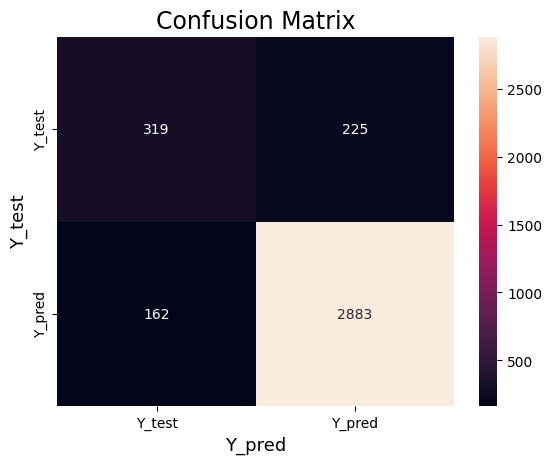

In [204]:
sns.heatmap(cm1,
            annot=True,
            fmt='g',
            xticklabels=['Y_test', 'Y_pred'],
            yticklabels=['Y_test', 'Y_pred'])
plt.ylabel('Y_test',fontsize=13)
plt.xlabel('Y_pred',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

# Example text predict positive or negative

In [36]:
test = "bad product"
model.predict(features.transform([test]))[0]

'Negative'

In [37]:
test = "Product is not good"
model.predict(features.transform([test]))[0]

'Positive'

In [38]:
test = "very nice product"
model.predict(features.transform([test]))[0]

'Positive'

In [39]:
test = "its avarage not for good"
model.predict(features.transform([test]))[0]

'Positive'

# tokenized word graph

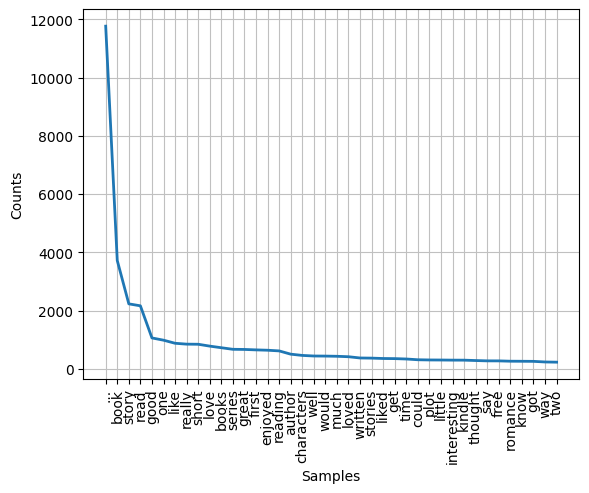

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [40]:
tokenized_word=word_tokenize((df['clean_Review_text'].to_string()))
fdist = FreqDist(tokenized_word)
fdist.plot(40,cumulative=False)

In [57]:
text = df['reviewText'][550]
doc = nlp(text)

In [58]:
type(doc)
print(doc)

Very short crazy hot I like threesomes where all three interact and here indeed there was interaction aplenty Cassie grew up with Kyle and Alan and in her teenage heart had angst not knowing which one to chose not understanding why she couldn t choose But then one night she sees the two of them together and thinks that she now understands it all they weren t choosing her they had each other But now it s a few years later and she s coming home one last time before marrying someone else And very quickly issues are resolved and they form into a coherent threesome I liked it because they knew each other they had history and love so I could accept the anguished sex I liked the relationship between the men as well and there was m m m f and m f m sex The end was a little twee but it s hot hot hot and a keeper for me 


In [59]:
for token in doc:
    print(token.text)

Very
short
crazy
hot
I
like
threesomes
where
all
three
interact
and
here
indeed
there
was
interaction
aplenty
Cassie
grew
up
with
Kyle
and
Alan
and
in
her
teenage
heart
had
angst
not
knowing
which
one
to
chose
not
understanding
why
she
couldn
t
choose
But
then
one
night
she
sees
the
two
of
them
together
and
thinks
that
she
now
understands
it
all
they
weren
t
choosing
her
they
had
each
other
But
now
it
s
a
few
years
later
and
she
s
coming
home
one
last
time
before
marrying
someone
else
And
very
quickly
issues
are
resolved
and
they
form
into
a
coherent
threesome
I
liked
it
because
they
knew
each
other
they
had
history
and
love
so
I
could
accept
the
anguished
sex
I
liked
the
relationship
between
the
men
as
well
and
there
was
m
m
m
f
and
m
f
m
sex
The
end
was
a
little
twee
but
it
s
hot
hot
hot
and
a
keeper
for
me


In [60]:
stopwords=spacy.lang.en.stop_words.STOP_WORDS
stopWords = list(stopwords)
len(stopWords)

326

In [61]:
for token in doc:
 if token.is_stop == False:
  print(token)

short
crazy
hot
like
threesomes
interact
interaction
aplenty
Cassie
grew
Kyle
Alan
teenage
heart
angst
knowing
chose
understanding
couldn
t
choose
night
sees
thinks
understands
weren
t
choosing
s
years
later
s
coming
home
time
marrying
quickly
issues
resolved
form
coherent
threesome
liked
knew
history
love
accept
anguished
sex
liked
relationship
men
m
m
m
f
m
f
m
sex
end
little
twee
s
hot
hot
hot
keeper


In [62]:
print(len(doc))
doc2=[]
for token in doc:
    if not token.is_stop:
        doc2.append(token)
print(len(doc2))

164
68


# parts of speech

In [63]:
#parts of speech
for token in doc:
    print(token,token.tag_,token.pos_,spacy.explain(token.tag_))

Very RB ADV adverb
short JJ ADJ adjective (English), other noun-modifier (Chinese)
crazy JJ ADJ adjective (English), other noun-modifier (Chinese)
hot JJ ADJ adjective (English), other noun-modifier (Chinese)
I PRP PRON pronoun, personal
like VBP VERB verb, non-3rd person singular present
threesomes NNS NOUN noun, plural
where WRB SCONJ wh-adverb
all DT DET determiner
three CD NUM cardinal number
interact NN NOUN noun, singular or mass
and CC CCONJ conjunction, coordinating
here RB ADV adverb
indeed RB ADV adverb
there EX PRON existential there
was VBD VERB verb, past tense
interaction NN NOUN noun, singular or mass
aplenty JJ ADJ adjective (English), other noun-modifier (Chinese)
Cassie NNP PROPN noun, proper singular
grew VBD VERB verb, past tense
up RP ADP adverb, particle
with IN ADP conjunction, subordinating or preposition
Kyle NNP PROPN noun, proper singular
and CC CCONJ conjunction, coordinating
Alan NNP PROPN noun, proper singular
and CC CCONJ conjunction, coordinating
in IN A

In [64]:
displacy.render(doc,style = 'dep',jupyter=True, options ={'distance':80})

In [65]:
for entity in doc.ents:
    print(entity.text,'------->',entity.label_)
displacy.render(doc,style='ent',jupyter = True)

three -------> CARDINAL
Kyle -------> PERSON
Alan -------> PERSON
one night -------> TIME
two -------> CARDINAL
a few years later -------> DATE
one -------> CARDINAL


In [66]:
doc=nlp(text)
for token in doc:
 print(token.text,'------->',token.has_vector)

Very -------> True
short -------> True
crazy -------> True
hot -------> True
I -------> True
like -------> True
threesomes -------> True
where -------> True
all -------> True
three -------> True
interact -------> True
and -------> True
here -------> True
indeed -------> True
there -------> True
was -------> True
interaction -------> True
aplenty -------> True
Cassie -------> True
grew -------> True
up -------> True
with -------> True
Kyle -------> True
and -------> True
Alan -------> True
and -------> True
in -------> True
her -------> True
teenage -------> True
heart -------> True
had -------> True
angst -------> True
not -------> True
knowing -------> True
which -------> True
one -------> True
to -------> True
chose -------> True
not -------> True
understanding -------> True
why -------> True
she -------> True
couldn -------> True
t -------> True
choose -------> True
But -------> True
then -------> True
one -------> True
night -------> True
she -------> True
sees -------> True
the --

In [67]:
text = "good"
text1 = "bad"
doc = nlp(text)
doc1= nlp(text1)
doc.similarity(doc1)

0.7992509521024121

In [68]:
text = "summer"
text1 = "hot"
doc = nlp(text 
doc1= nlp(text1)
doc.similarity(doc1)

0.04579562718921901

In [70]:
text = "not bad"
text1 = "not good"
doc = nlp(text)
doc1= nlp(text1)
doc.similarity(doc1)

0.9158880770709071

In [71]:
punct = string.punctuation
print(punct)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [72]:
def cleanText(sent):
    doc = nlp(sent)
    tokens = []

In [73]:
for token in doc:
    if token.lemma !="-PRON-":
        tokens = (token.lemma_.lower().strip())
    else:
        tokens.append(token.lemma_)

In [74]:
cleanTokens = []

In [75]:
def c ():
 for token in tokens:
  if token not in stopWords and token not in punct:
   cleanTokens.append(token)
 return cleanTokens

# SVM classification_report

In [210]:
tfidf = TfidfVectorizer(tokenizer = cleanText) 
classifier = LinearSVC()
X = df["clean_Review_text"]
Y = df["scoreStatus"]
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [211]:
X_train.shape, Y_test.shape

((8373,), (3589,))

In [212]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

    Negative       0.66      0.59      0.62       544
    Positive       0.93      0.95      0.94      3045

    accuracy                           0.89      3589
   macro avg       0.80      0.77      0.78      3589
weighted avg       0.89      0.89      0.89      3589



# LogisticRegression classification_report

In [207]:
tfidf = TfidfVectorizer(tokenizer = cleanText) 
classifier = LogisticRegression()
x = df["clean_Review_text"]
y = df["scoreStatus"]
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [208]:
x_train.shape, y_test.shape

((8373,), (3589,))

In [209]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Negative       0.77      0.55      0.64       544
    Positive       0.92      0.97      0.95      3045

    accuracy                           0.91      3589
   macro avg       0.84      0.76      0.79      3589
weighted avg       0.90      0.91      0.90      3589



In [138]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
df["polarity"] = df["reviewText"].apply(pol)
df["subjectivity"] = df["reviewText"].apply(sub)

In [139]:
df

Unnamed: 0.1  Unnamed: 0        asin  helpful  rating  \
0                 0       11539  B0033UV8HI  [8, 10]       3   
1                 1        5957  B002HJV4DE   [1, 1]       5   
2                 2        9146  B002ZG96I4   [0, 0]       3   
3                 3        7038  B002QHWOEU   [1, 3]       3   
4                 4        1776  B001A06VJ8   [0, 1]       4   
...             ...         ...         ...      ...     ...   
11957         11995        2183  B001DUGORO   [0, 0]       4   
11958         11996        6272  B002JCSFSQ   [2, 2]       5   
11959         11997       12483  B0035N1V7K   [0, 1]       5   
11960         11998        3640  B001W1XT40   [1, 2]       1   
11961         11999       11398  B003370JUS   [5, 6]       3   

                                              reviewText   reviewTime  \
0      Jace Rankin may be short but he s nothing to m...   09 2, 2010   
1      Great short read I didn t want to put it down ...   10 8, 2013   
2      I ll start by saying this is the first of four...  04 11, 2014   
3      Aggie is Angela Lansbury who carries pocketboo...   07 5, 2014   
4      I did not expect this type of book to be in li...  12 31, 2012   
...                                                  ...          ...   
11957  Valentine cupid is a vampire Jena and Ian anot...  02 28, 2014   
11958  I have read all seven books in this series Apo...  05 16, 2011   
11959  This book really just wasn t my cuppa The situ...  07 26, 2013   
11960  tried to use it to charge my kindle it didn t ...  09 17, 2013   
11961  Taking Instruction is a look into the often hi...   07 5, 2012   

           reviewerID                   reviewerName  \
0      A3HHXRELK8BHQG                         Ridley   
1      A2RGNZ0TRF578I                   Holly Butler   
2      A3S0H2HV6U1I7F                        Merissa   
3       AC4OQW3GZ919J                     Cleargrace   
4      A3C9V987IQHOQD                       Rjostler   
...               ...                            ...   
11957  A1OKS5Q1HD8WQC                  lisa jon jung   
11958   AQRSPXLNEQAMA                        TerryLP   
11959  A2T5QLT5VXOJAK                        hwilson   
11960  A28MHD2DDY6DXB  Allison A. Slater "Gryphon50"   
11961  A3JUXLB4K9ZXCC                      Dafna Yee   

                                                 summary  unixReviewTime  \
0                               Entertaining But Average      1283385600   
1                                Terrific menage scenes!      1381190400   
2                                       Snapdragon Alley      1397174400   
3                                 very light murder cozy      1404518400   
4                                                   Book      1356912000   
...                                                  ...             ...   
11957                                               jena      1393545600   
11958                                Peacekeepers Series      1305504000   
11959                                    a little creepy      1374796800   
11960                                        didn't work      1379376000   
11961  If you like BDSM with a touch of romance, this...      1341446400   

                                       clean_Review_text  polarity  \
0      jace rankin may short nothing mess man hauled ...  0.100172   
1      great short read want put read one sitting sex...  0.340067   
2      start saying first four books expecting conclu...  0.290000   
3      aggie angela lansbury carries pocketbooks inst...  0.417143   
4      expect type book library pleased find price right  0.392857   
...                                                  ...       ...   
11957  valentine cupid vampire jena ian another vampi...  0.316667   
11958  read seven books series apocalyptic adventure ...  0.355357   
11959  book really cuppa situation man capturing woma...  0.165000   
11960  tried use charge kindle even register charging... -0.333333   
11961

In [119]:
import base64

In [120]:
from IPython.display import HTML

def create_download_link( df, title = "Download CSV file", filename = "After_process_kindle_dataset1.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(df)

In [121]:
import sys
print(sys.executable)

C:\Users\jeeva\AppData\Local\Programs\Python\Python311\python.exe
